# Descriptors

- 분자가 가지고 있는 물리, 화학적인 특성 값을 머신러닝 모델 입력으로 사용하는 방법
 - 분자량, 용해도, 독성, 3차원 정보, 질량, 극성, 아로마틱 등을 사용한다
- 분석 목적에 따라 필요한 특성을 선택(feature selection)하거나 특성 변환 등 데이터 전처리가 필요하다

- Fingerprints: 각 분자를 1024/2048 비트 정보로 압축 표현하는 방식, 컬럼수가 1024/2048로 고정된다
 - Fingerprints를 일종의 임베딩 벡터라고 볼 수 있다 (분자 특성을 반영하여 1차원 어레이, 즉, 벡터로 표현한 것)

# import

In [ ]:
# deepchem을 설치하면 rdkit이 같이 설치된다
!pip install deepchem
import deepchem as dc

In [2]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole     # 화면에 출력하기 위한 옵션
# from rdkit.Chem import rdDepictor

IPythonConsole.ipython_useSVG = True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Descriptors 추가


In [4]:
# Glycine, Phenylalanine, Histidine, Cysteine 의 SMILES 데이터
smiles_dict = {'Glycine' : 'C(C(=O)O)N', 'Phenylalanine' : 'N[C@@H](CC1=CC=CC=C1)C(O)=O', 'Histidine' : 'O=C([C@H](CC1=CNC=N1)N)O', 'Cysteine' : 'C([C@@H](C(=O)O)N)S'}
smiles_dict

{'Glycine': 'C(C(=O)O)N',
 'Phenylalanine': 'N[C@@H](CC1=CC=CC=C1)C(O)=O',
 'Histidine': 'O=C([C@H](CC1=CNC=N1)N)O',
 'Cysteine': 'C([C@@H](C(=O)O)N)S'}

- Descriptors를 이용하기 위해 mol 객체를 먼저 만들어야 한다
- SMILES로부터 MolFromSmiles 함수를 사용하여 mol 객체를 얻는다
- mol_dict에 key와 value로 저장한다

In [5]:
mol_dict = {}
for molecule in smiles_dict.keys():
    mol = Chem.MolFromSmiles(smiles_dict[molecule])
    mol_dict[molecule] = mol
mol_dict

{'Glycine': <rdkit.Chem.rdchem.Mol at 0x7b06439468f0>,
 'Phenylalanine': <rdkit.Chem.rdchem.Mol at 0x7b0643945460>,
 'Histidine': <rdkit.Chem.rdchem.Mol at 0x7b06439444a0>,
 'Cysteine': <rdkit.Chem.rdchem.Mol at 0x7b06431ce9d0>}

## 특성 보기

- mol 객체가 제공하는 함수
 - 원자수 얻기: GetNumAtoms()
- mol 객체에 수소원자를 추가하기: Chem. AddHs()
- Descriptors가 제공하는 함수
 - 분자량 얻기: ExactMolWt()

In [6]:
mol = mol_dict['Glycine']

print(f'{molecule}의 수소를 제외한 원자 개수 : ', mol.GetNumAtoms())
print(f'{molecule}의 수소를 포함한 원자 개수 : ', Chem.AddHs(mol).GetNumAtoms(), end='\n\n')

#분자량 얻기
print(f'{molecule}의 분자량 : ', Descriptors.ExactMolWt(mol))

Cysteine의 수소를 제외한 원자 개수 :  5
Cysteine의 수소를 포함한 원자 개수 :  10

Cysteine의 분자량 :  75.0320284


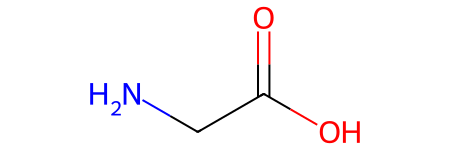

In [7]:
mol

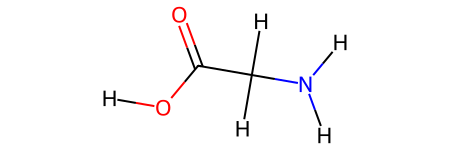

In [8]:
Chem.AddHs(mol)

In [9]:
# 분자의 여러가지 특성을 한번에 얻는 함수 CalcMolDescriptors() 사용 예

Desc_dict = Descriptors.CalcMolDescriptors(mol)
print(len(Desc_dict))
Desc_dict

209


{'MaxAbsEStateIndex': 9.243055555555555,
 'MaxEStateIndex': 9.243055555555555,
 'MinAbsEStateIndex': 0.2777777777777779,
 'MinEStateIndex': -0.9675925925925923,
 'qed': 0.42117088793654706,
 'MolWt': 75.06700000000001,
 'HeavyAtomMolWt': 70.027,
 'ExactMolWt': 75.0320284,
 'NumValenceElectrons': 30,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.31675597840558584,
 'MinPartialCharge': -0.4802971300243957,
 'MaxAbsPartialCharge': 0.4802971300243957,
 'MinAbsPartialCharge': 0.31675597840558584,
 'FpDensityMorgan1': 2.0,
 'FpDensityMorgan2': 2.2,
 'FpDensityMorgan3': 2.2,
 'BCUT2D_MWHI': 16.366059254527027,
 'BCUT2D_MWLOW': 10.717499991234309,
 'BCUT2D_CHGHI': 1.8050321424204203,
 'BCUT2D_CHGLO': -1.726114540149436,
 'BCUT2D_LOGPHI': 1.4339024756587613,
 'BCUT2D_LOGPLOW': -2.104229346355766,
 'BCUT2D_MRHI': 5.680936538605497,
 'BCUT2D_MRLOW': -0.1348391979770351,
 'AvgIpc': 1.3787834934861756,
 'BalabanJ': 2.847378923087672,
 'BertzCT': 42.91260938324327,
 'Chi0': 4.284457050376173,
 '

## 지질 친화성 데이터

- 분자의 지질친화성 lipophilicity을 나타내는 분배계수, distribution coefficent: P
- 물과 옥탄올에 대한 평형상태의 용해농도의 비율
 - log10P 값이 클수록 지질 친화성이 큰 것을 나타낸다


In [10]:
# 데이터 다운로드 (컬럼명을 'smiles'와 'logP'로 지정)
logP_data = pd.read_csv('https://raw.githubusercontent.com/StillWork/data/master/logP_dataset.csv',
            names=['smiles', 'logP'])

print(logP_data.shape)
logP_data[:3]

(14610, 2)


,smiles,logP
0,C[C@H]([C@@H](C)Cl)Cl,2.3
1,C(C=CBr)N,0.3
2,CCC(CO)Br,1.3


- Chem.MolFromSmiles() 함수를 이용하여 SMILES로부터 Mol 객체를 얻는다

In [11]:
df = logP_data.copy()
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x))

# 리스트를 생성하는 다른 방법
# df['mol'] = [Chem.MolFromSmiles(x) for x in df['smiles']]

print(type(df['mol'][1]))

<class 'rdkit.Chem.rdchem.Mol'>


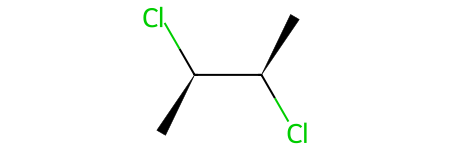

In [12]:
df.mol[0]

## 분자 시각화

- rdkit.Chem.Draw를 사용하여 mol 객체를 시각화할 수 있다
- Draw.MolsToGridImage()를 사용하면 그리드 형태로 그릴 수 있다

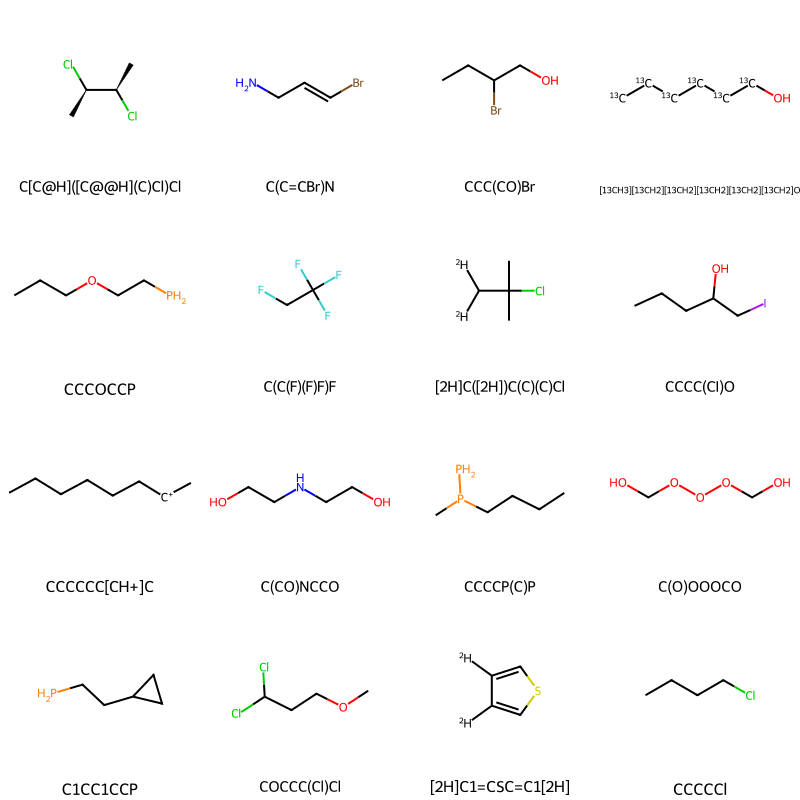

In [13]:
# 16개 이미지를 그리드 형태로 그리기
mols = df['mol'][:16]
img = Draw.MolsToGridImage(mols, molsPerRow=4, useSVG=True, legends=list(df['smiles'][:16].values))
img

## 특성 추가

- Chem 모듈에서 분자의 다양한 속성 정보를 추출하는 함수를 제공한다
 - AddHs(): mol 객체에 수소 원자를 추가
- mol 객체가 제공하는 함수
 - GetNumAtoms(): 모든 원자 수 얻기
 - GetNumHeavyAtoms(): 수소를 제외한 원자의 수 얻기

In [14]:
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['mW'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())
df[:3]

,smiles,logP,mol,mW,num_of_atoms,num_of_heavy_atoms
0,C[C@H]([C@@H](C)Cl)Cl,2.3,<rdkit.Chem.rdchem.Mol object at 0x7b0640cb53f0>,126.000306,14,6
1,C(C=CBr)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7b0640cb54d0>,134.968361,11,5
2,CCC(CO)Br,1.3,<rdkit.Chem.rdchem.Mol object at 0x7b0640cb5540>,151.983677,15,6


# Fingerprints

- 분자를 구성하는 각 원자의 주변 원자와의 결합 정보를 기반으로 특정 '숫자'들을 계산하고 이를 주변의 원자들에 대해 반복적으로 수행하여 숫자를 업데이트 한다
- 각 분자의 특성을 **일정한 길이**의 비트 패턴으로 표현한다 (1024, 2048 비트 등)
- 두 분자의 특성이 유사하다면 fingerprints의 같은 위치의 비트값이 가능한 일치하도록 정의하였다
- 여러가지 버전이 있으며 Morgan fingerprints, Extended Connectivity Fingerprints (ECFP)가 널리 사용된다
- 표현형의 크기가 일정하고 분자간의 유사도를 간단히 계산할 수 있다는 장점이 있다

## MorganFingerprint

- Glycine를 MorganFingerprint로 표현하겠다
- fingerprint를 앞의 100개만 출력한다
- 값이 1인 위치를 찾는다
- GetMorganFingerprintAsBitVect() 함수를 사용한다

In [15]:
bi= {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol_dict['Glycine'], 2, nBits=1024, bitInfo=bi)
print(fp)
fp_arr = np.zeros((1,)) # array([0.])

DataStructs.ConvertToNumpyArray(fp,fp_arr) # numpy array로 변환
print(fp_arr[:100])
print(np.nonzero(fp_arr)) # 0이 아닌 값의 위치(index)를 알려준다

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)


- 위에서 fp는 fingerprint 객체이며 fp_arr는 눈으로 확인하기 위해서 어레이를 만든 것이다

In [16]:
print(type(fp))
print(type(fp_arr))
print(len(fp))

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'numpy.ndarray'>
1024


## Fingerprint 비트 정보 보기
- MorganFingerprint 특정 위치의 값이 1이면 어떤 특성을 포함하고 있는지를 알려준다
- GetOnBits() 함수 사용

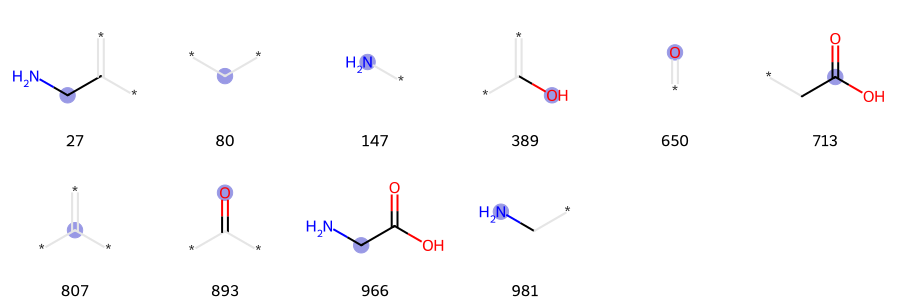

In [17]:
from rdkit.Chem import Draw

points = [(mol_dict['Glycine'], x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(points, molsPerRow=6, legends = [str(x) for x in fp.GetOnBits()])

## 두 분자의 유사도 비교
- fingerprint를 사용하여 두 분자의 특성이 얼마나 비슷한지를 파악한다
- Tanimoto Similarity는 두 분자의 fingerprint 들의 겹치는 정도를 측정한다 (교집합/합집합)

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-24%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2012.05.25.png?raw=1" width= 300 align='left'>

- Glycine와 Cysteine의 유사도를 비교하겠다

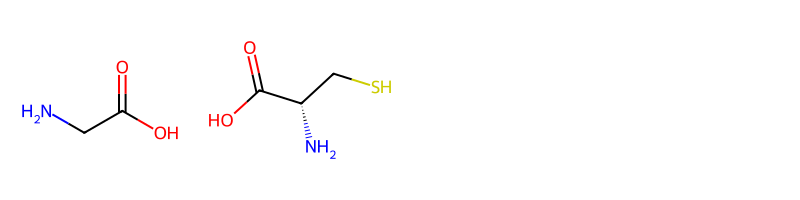

In [18]:
Draw.MolsToGridImage([mol_dict['Glycine'], mol_dict['Cysteine']], molsPerRow=4)

In [19]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol_dict['Cysteine'], 2, nBits=1024, bitInfo=bi)
print('cysteine',list(fp2.GetOnBits()))
print('glycine',list(fp.GetOnBits()))

cysteine [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
glycine [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]


In [20]:
# 직접 계산하는 방법
common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
combined = set(fp2.GetOnBits()) | set(fp.GetOnBits())
print(common)
print(combined)
print('직접 계산:',len(common)/len(combined))

# TanimotoSimilarity()를 사용하는 방법
print('Tanimoto 유사도 계산:', DataStructs.TanimotoSimilarity(fp, fp2))

{389, 807, 650, 80, 147, 893}
{1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}
직접 계산: 0.3
Tanimoto 유사도 계산: 0.3


## Deepchem 데이터 읽기

- deepchem이 제공하는 Dataset을 로드할 때 원하는 특성을 선택할 수 있다
- deepchem이 제공하는 load_delaney 함수를 사용하여 용해도 데이터를 다운로드한다
- 이때 featurizer='ECFP'를 지정하여 특성으로 ECFP를 선택하였다
- featurizer 인자로 옵션을 지정하며 'ECFP', 'GraphConv' 등을 선택할 수 있다

In [21]:
# import deepchem as dc
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='ECFP')
train_dataset, valid_dataset, test_dataset = datasets

In [22]:
train_dataset.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [23]:
# 1이 들어있는 비율
train_dataset.X[0].mean()

0.0205078125

In [24]:
train_dataset.X.shape, test_dataset.X.shape

((902, 1024), (113, 1024))

In [25]:
train_dataset.y[:10]

array([[ 0.39041294],
       [ 0.09042128],
       [-2.46434643],
       [ 0.70492033],
       [ 1.15974639],
       [-0.03538168],
       [-0.60149498],
       [ 0.51137732],
       [-0.14666891],
       [-0.91358308]])

# 그래프 표현형

- 분자를 구성하는 원자와 결합을 노드와 엣지로 표현하는 방식이다
- 최근 딥러닝 모델의 입력으로 그래프 표현형이 널리 사용되고 있다
- 그래프 표현형을 처리하는 딥러닝 모델로는 그래프 컨볼류션 네크워크(Graph Convolutio Network)이 널리 사용된다

![분자 그래프](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/basic_graphs.gif?raw=1)

# 표현 학습 (Feature Learning)

- 머신러닝 모델의 성능향상에 도움이 되는 특성(feature)를 선택하거나 가공하는 작업을 특성 공학(feature engineering)이라고 하며 주로 이 분야의 전문가가 작업하였다
- 예를 들어, 적절한 molecular descriptor를 찾아내는 작업 등을 말한다
- 딥러닝 모델을 사용하면 이러한 특성공학 작업을 줄여준다. feature learning을 통하여 유효한 특성을 추출하는 작업을 사람대신 수행해준다
- feature learning을 representation lerning이라고도 부른다
- 전문가의 개입이 아니라 데이터로부터 딥러닝 모델이 특성을 추출하는 것이다
- 이러한 표현 학습 방식은 이미지 인식, 언어 이해 분야에서 이미 성과를 입증했고 이제 화학정보학, 생물정보학에도 사용되고 있다